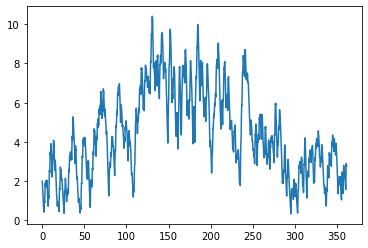

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
filename = 'result_step1_LEVEL.pckl'
infile = open(filename,'rb')
data = pickle.load(infile)
infile.close()

t_ = data[:,0]

y_ = data[:,1]
plt.plot(t_,y_)

# Simulate drift

0.010416666666666666
[[1.22761594e-07 0.00000000e+00]
 [1.76776695e-05 1.02062073e-05]]


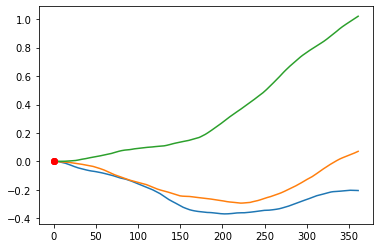

In [2]:
eta = 0.2*1/1000
sigma = 1
r0 = np.zeros(3)
J = len(r0)
t_delta = t_[1]-t_[0]
N = len(t_)
alpha = np.sqrt(t_delta)*eta
print(t_delta)

x1 = r0
d0 = np.ones(J)*0
x0 = d0/10000

np.random.seed(5)
np.random.seed(0)

A = np.eye(2)*1+np.array([[0,t_delta],[0,0]])
CovW = t_delta*np.array([[1/3*t_delta**2,1/2*t_delta],
                      [1/2*t_delta,1] ])*eta**2 #[ m^2  m*m/d ;  m*m/d (m/d)^2 ]
B = np.linalg.cholesky(CovW) #[ m ; m/d ]
print(B)
x1 = np.zeros(2)
x2 = np.zeros(2)
x3 = np.zeros(2)
X1 =[]
#X1.append(x1[0])
X2 =[]
#X2.append(x2[0])
X3 =[]
#X3.append(x3[0])
    
for t in range(N ):
    x1 = A@x1+B@np.random.randn(2) # [ m ; m/d ]
    X1.append(x1[0])
    
    x2 = A@x2+B@np.random.randn(2)
    X2.append(x2[0])
    
    x3 = A@x3+B@np.random.randn(2)
    X3.append(x3[0])
    pass
X0 = np.array([X1,X2,X3]).T

plt.plot(t_,X0)
plt.plot(np.zeros(J),d0,'ro')

In [7]:
J = 3
E = np.random.randn(N,J)*sigma/1000

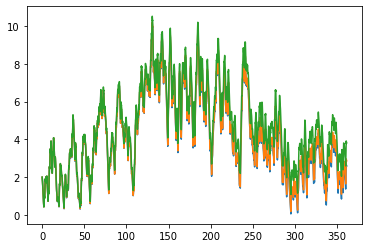

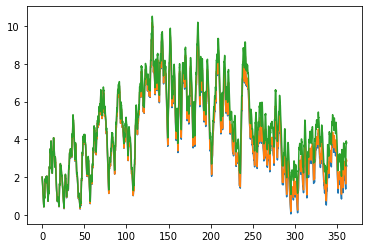

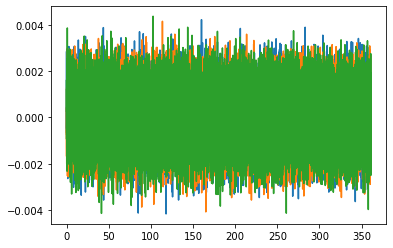

In [8]:
z_low = np.array([0,0,0])
z_ = np.maximum(y_[:,None],z_low[None,:])
z_ = z_+1*X0
ztil_ = z_+E

plt.plot(t_,z_,'-');
plt.show()
plt.plot(t_,ztil_,'-');
plt.show()
plt.plot(t_,E,'-');
plt.show()

data_A = np.vstack([t_,ztil_.T*1000]).T
import pickle

filename = 'result_step2_SIGNAL_UNSAT.pckl'
outfile = open(filename,'wb')
pickle.dump(data_A,outfile)
outfile.close()


# Simulate signal saturation

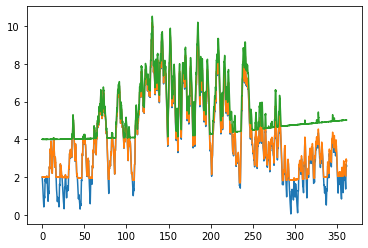

In [9]:
lambda1 = 0
lambda2 = 2
lambda3 = 4

z_low = np.array([lambda1,lambda2,lambda3])
z_ = np.maximum(y_[:,None],z_low[None,:])
z_ = z_+1*X0
ztil_ = z_+E

plt.plot(t_,ztil_,'-');
plt.show()

data_B = np.vstack([t_,ztil_.T*1000]).T
import pickle

filename = 'result_step2_SIGNAL_SAT.pckl'
outfile = open(filename,'wb')
pickle.dump(data_B,outfile)
outfile.close()

In [6]:
filename = 'result_step2_SIGNAL_BIAS.pckl'
outfile = open(filename,'wb')
pickle.dump(X0*1000,outfile)
outfile.close()